In [1]:
pwd


u'/home/shiyan/caffe-master-cost-sensitive/examples'

In [3]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.


In [2]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


In [4]:
caffe.set_mode_cpu()


In [5]:
model_weights = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/caffe_alexnet_train_12_iter_2000.caffemodel'

​

net = caffe.Net(model_def,      # defines the structure of the model

                model_weights,  # contains the trained weights

                caffe.TEST)     # use test mode (e.g., don't perform dropout)

SyntaxError: invalid syntax (<ipython-input-5-631bb10dbda9>, line 3)

In [6]:
caffe.set_mode_cpu()

​

model_def = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/deploy-50.prototxt'

model_weights = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/caffe_alexnet_train_12_iter_2000.caffemodel'

​

net = caffe.Net(model_def,      # defines the structure of the model

                model_weights,  # contains the trained weights

                caffe.TEST)     # use test mode (e.g., don't perform dropout)

SyntaxError: invalid syntax (<ipython-input-6-07326385ce63>, line 3)

In [7]:
caffe.set_mode_cpu()
model_def = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/deploy-50.prototxt'
model_weights = caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/caffe_alexnet_train_12_iter_2000.caffemodel'
net = caffe.Net(model_def,      # defines the structure of the model

                model_weights,  # contains the trained weights

                caffe.TEST)     # use test mode (e.g., don't perform dropout)


In [8]:
mu = np.load(caffe_root + 'myself/fine-ResNet-50/two_classification_problem/weighted-fine-resnet-128-7/mnist_train_lmdb_mean.npy'

SyntaxError: unexpected EOF while parsing (<ipython-input-8-61ed29143647>, line 1)

In [9]:
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')

In [10]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction

mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')

mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values

print 'mean-subtracted values:', zip('BGR', mu)

mean-subtracted values: [('B', 76.008954095363151), ('G', 73.589394884184003), ('R', 84.782681006123312)]


In [11]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})



transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension

transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel

transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]

transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

In [12]:
net.blobs['data'].reshape(50,        # batch size

                          3,         # 3-channel (BGR) images

                          112, 112)  # image size is 227x227

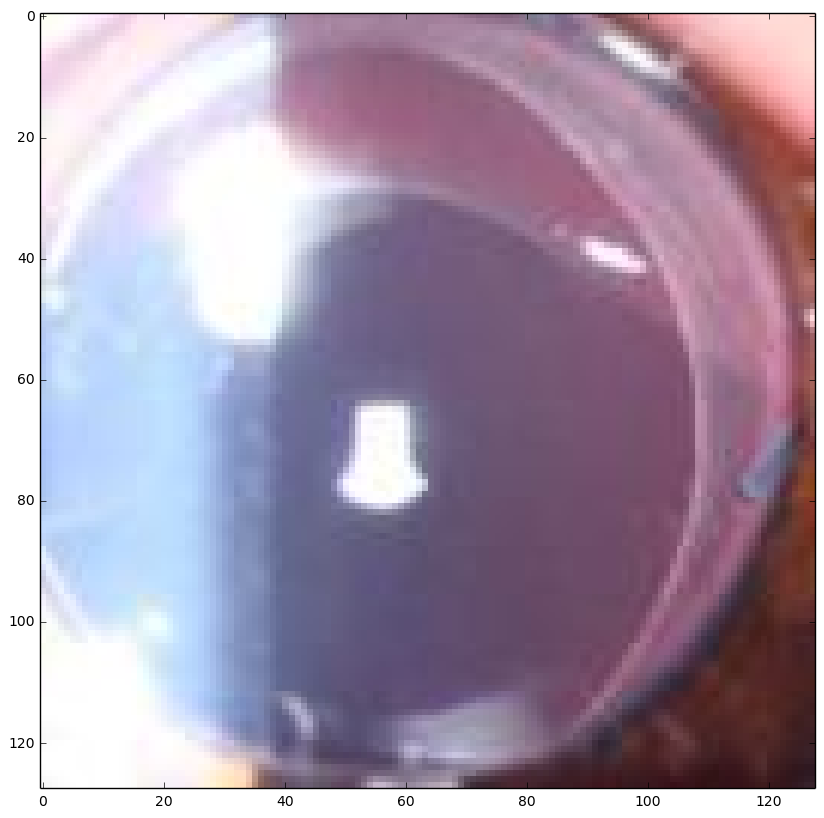

In [13]:
image = caffe.io.load_image(caffe_root + 'myself/hongfan-twoclass-1-10data-128/recurrence/4/20110427-203-2674.jpg')

transformed_image = transformer.preprocess('data', image)

plt.imshow(image)


In [14]:
net.blobs['data'].data[...] = transformed_image

In [15]:
output = net.forward()

In [16]:
output_prob = output['prob'][0]  # the output probability vector for the first image in the batch


print 'predicted class is:', output_prob.argmax()

predicted class is: 0


In [18]:
# sort top five predictions from softmax output

top_inds = output_prob.argsort()[::-1][:2]  # reverse sort and take five largest items



print 'probabilities and labels:'



probabilities and labels:


In [19]:
top_inds = output_prob.argsort()[::-1][:5]  # reverse sort and take five largest items


print 'probabilities and labels:'

zip(output_prob[top_inds], labels[top_inds])


probabilities and labels:


NameError: name 'labels' is not defined

In [20]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

mean-subtracted values: [('B', 76.008954095363151), ('G', 73.589394884184003), ('R', 84.782681006123312)]


In [21]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(50,        # batch size
                          3,         # 3-channel (BGR) images
                          112, 112)  # image size is 227x227

In [22]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(50, 3, 112, 112)
conv1	(50, 64, 56, 56)
pool1	(50, 64, 28, 28)
pool1_pool1_0_split_0	(50, 64, 28, 28)
pool1_pool1_0_split_1	(50, 64, 28, 28)
res2a_branch1	(50, 256, 28, 28)
res2a_branch2a	(50, 64, 28, 28)
res2a_branch2b	(50, 64, 28, 28)
res2a_branch2c	(50, 256, 28, 28)
res2a	(50, 256, 28, 28)
res2a_res2a_relu_0_split_0	(50, 256, 28, 28)
res2a_res2a_relu_0_split_1	(50, 256, 28, 28)
res2b_branch2a	(50, 64, 28, 28)
res2b_branch2b	(50, 64, 28, 28)
res2b_branch2c	(50, 256, 28, 28)
res2b	(50, 256, 28, 28)
res2b_res2b_relu_0_split_0	(50, 256, 28, 28)
res2b_res2b_relu_0_split_1	(50, 256, 28, 28)
res2c_branch2a	(50, 64, 28, 28)
res2c_branch2b	(50, 64, 28, 28)
res2c_branch2c	(50, 256, 28, 28)
res2c	(50, 256, 28, 28)
res2c_res2c_relu_0_split_0	(50, 256, 28, 28)
res2c_res2c_relu_0_split_1	(50, 256, 28, 28)
res3a_branch1	(50, 512, 14, 14)
res3a_branch2a	(50, 128, 14, 14)
res3a_branch2b	(50, 128, 14, 14)
res3a_branch2c	(50, 512, 14, 14)
res3a	(50, 512, 14, 14)
res3a_res3a_relu_0_split_0	(50, 5

In [23]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)


conv1	(64, 3, 7, 7) (64,)
bn_conv1	(64,) (64,)
scale_conv1	(64,) (64,)
res2a_branch1	(256, 64, 1, 1)

IndexError: Index out of range

In [24]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

 conv1	(64, 3, 7, 7) (64,)
bn_conv1	(64,) (64,)
scale_conv1	(64,) (64,)
res2a_branch1	(256, 64, 1, 1)

IndexError: Index out of range

In [25]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

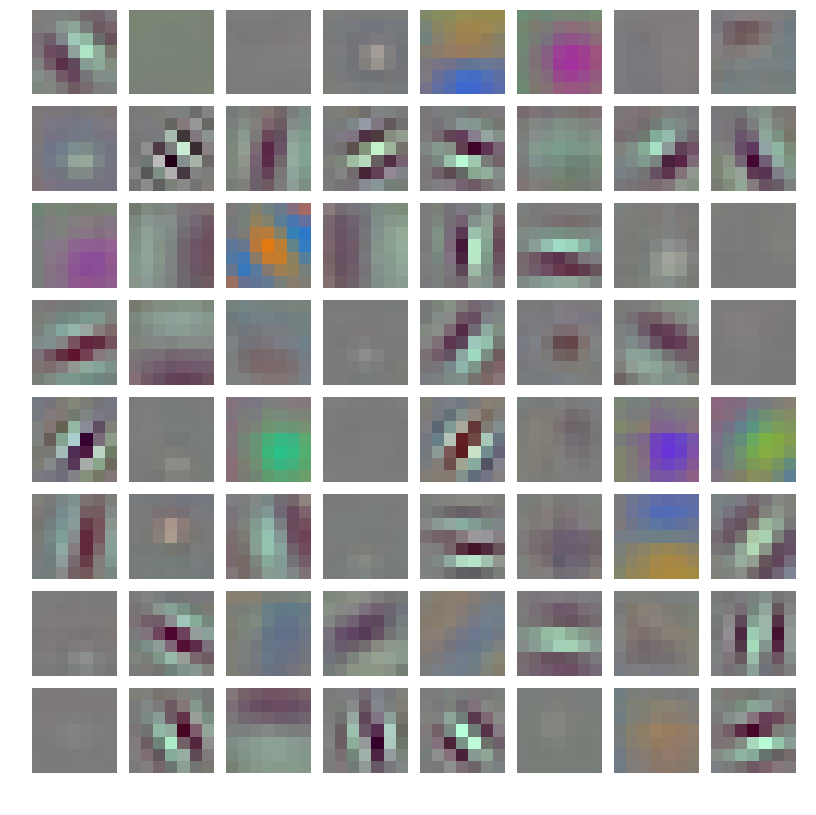

In [26]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

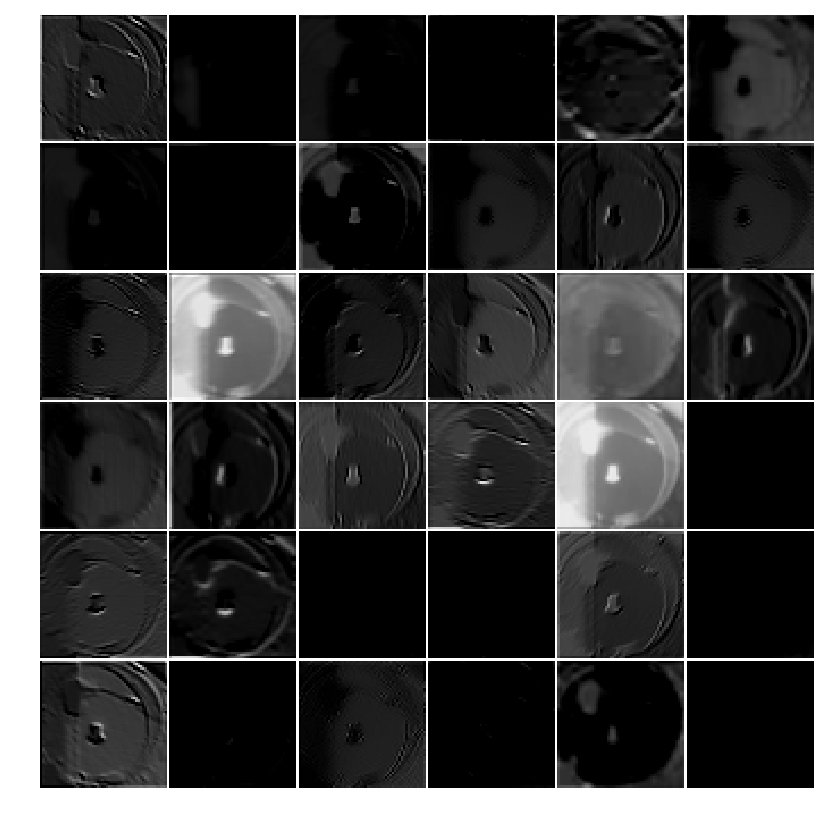

In [27]:

feat = net.blobs['conv1'].data[0, :36]
vis_square(feat)

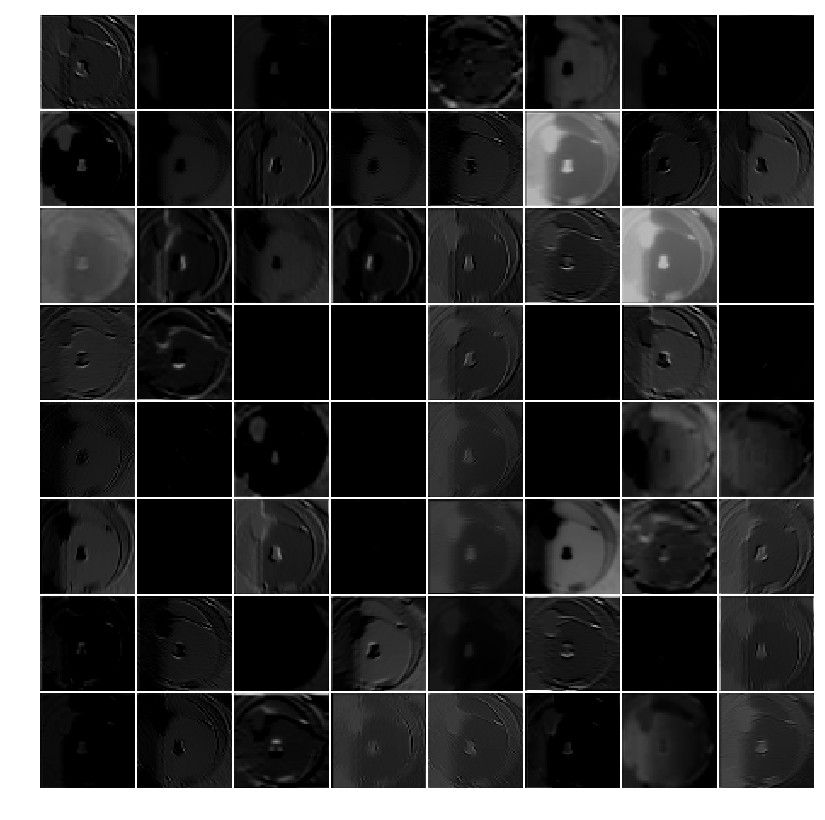

In [28]:
feat = net.blobs['conv1'].data[0, :100]
vis_square(feat)


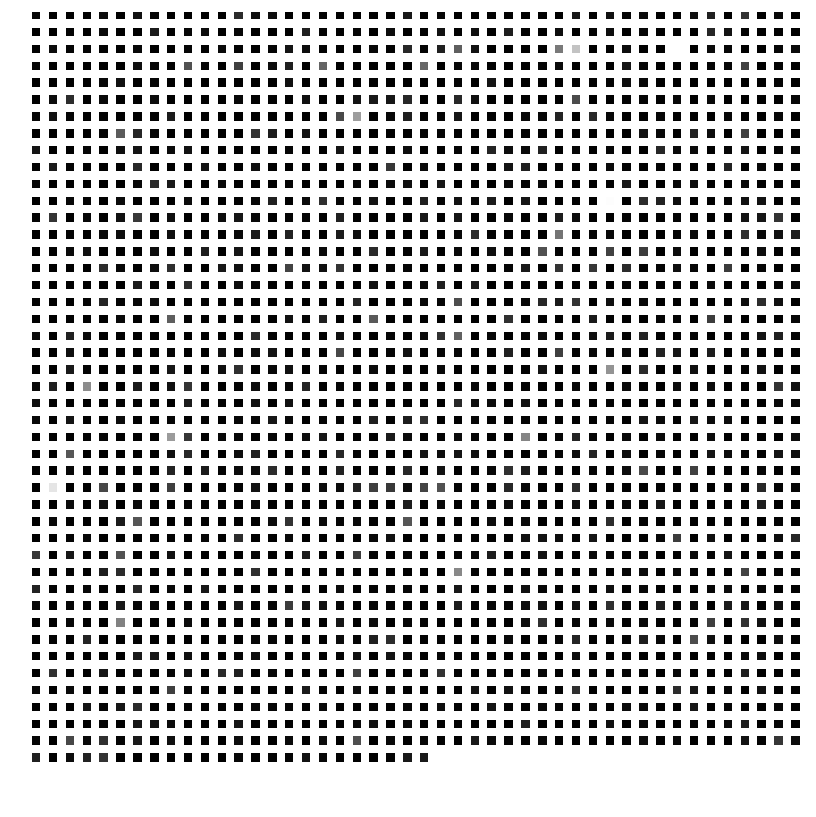

In [29]:
feat = net.blobs['pool5'].data[0]
vis_square(feat)